In [1]:
import xarray as xr
import numpy as np
import math
from scipy.ndimage.filters import gaussian_filter

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Constants and functions

In [3]:
G=6.67408*1e-11
# [m**3]
def volume_sphere(r):
    return 4./3*math.pi*r**3
# delta_density [g/cm**3] -> mass [kg]
def delta_mass_sphere(r, delta_density):
    return 1000.*delta_density*volume_sphere(r)
# [мГал]
def delta_grav(delta_mass, x,y,z):
    return (100.*1000)*G*delta_mass*z/np.power(x**2 + y**2 + z**2, 1.5)

def raster_gamma_range(raster0, g1, g2):
    raster = raster0.copy()
    raster.values = raster.values.astype(np.float32)
    raster.values = gaussian_filter(raster.values,g1,mode='constant', cval=np.nan) \
            - gaussian_filter(raster.values,g2,mode='constant', cval=np.nan)
    return raster

## Make synthetic gravity +

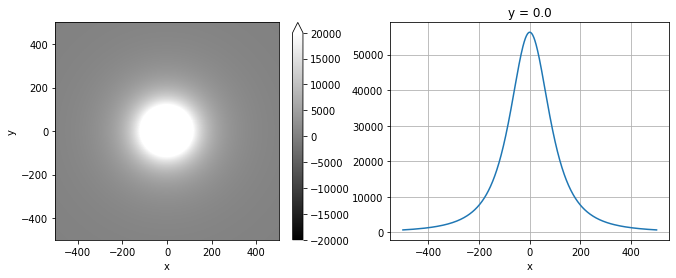

In [4]:
L = 500
l = np.linspace(-L,L,2*L+1)
(x,y) = np.meshgrid(l,l)

h = 120
r = 3

dg = delta_grav(delta_mass_sphere(r,1), x, y, h)

dga = xr.DataArray(dg, coords={'y': l[::-1], 'x': l}, dims=['y','x'])
dga.values = (2**30-1)*dga
dga.values = np.flipud(np.round(dga.values)).astype(np.int32)

f, ((ax1, ax2)) = plt.subplots(1,2, figsize=(11,4))
dga.sel(x=slice(-500,500),y=slice(500,-500)).plot(ax=ax1, cmap='gray',vmin=-20000,vmax=20000)
dga.sel(y=0).plot(ax=ax2)
plt.grid()

## Plots

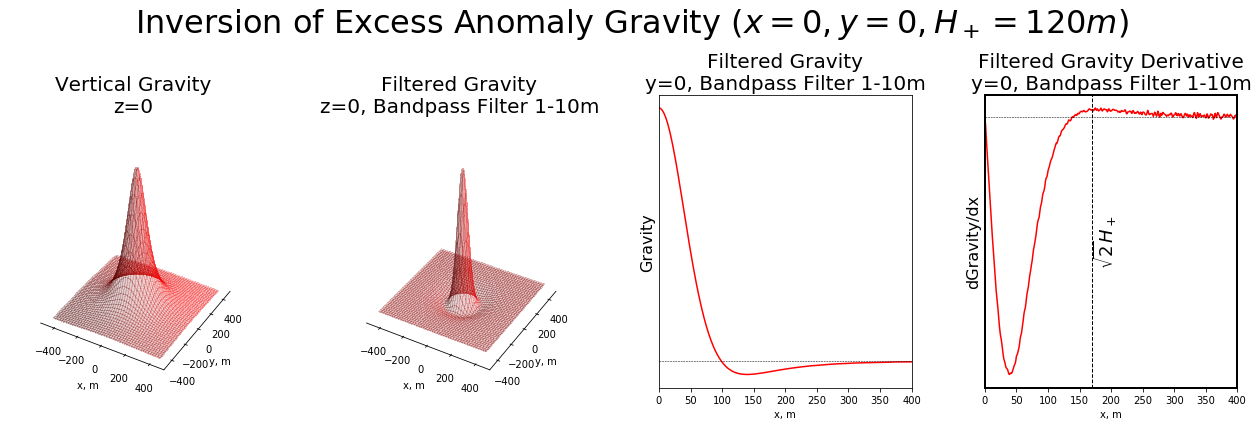

In [5]:
fdga = raster_gamma_range(dga, 1,10)

fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(1, 4, 1, projection='3d')
#dga.sel(x=slice(-500,500),y=slice(500,-500)).plot(ax=ax1, cmap='gray',vmin=0,vmax=20000, add_colorbar=False)
da = dga.sel(x=slice(-450,450),y=slice(450,-450))
(X,Y) = np.meshgrid(da.x,da.y)
Z=da.values
surf = ax1.plot_surface(X, Y, Z,linewidth=0, antialiased=False, color='red',alpha=0.2)
ax1.set_title('Vertical Gravity\nz=0', fontsize=20)
ax1.set_xlabel('x, m')
ax1.set_ylabel('y, m')
# make the panes transparent
ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.grid(False)
ax1.w_zaxis.line.set_lw(0.)
ax1.set_zticks([])
#ax1.axis('off')

ax4 = fig.add_subplot(1, 4, 2, projection='3d')
da = fdga.sel(x=slice(-450,450),y=slice(450,-450))
(X,Y) = np.meshgrid(da.x,da.y)
Z=da.values
surf = ax4.plot_surface(X, Y, Z,linewidth=0, antialiased=False, color='red',alpha=0.2)
ax4.set_title('Filtered Gravity\nz=0, Bandpass Filter 1-10m', fontsize=20)
ax4.set_xlabel('x, m')
ax4.set_ylabel('y, m')
# make the panes transparent
ax4.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax4.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax4.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax4.grid(False)
ax4.w_zaxis.line.set_lw(0.)
ax4.set_zticks([])
#ax4.axis('off')

ax5 = fig.add_subplot(1, 4, 3)
fdga.sel(x=slice(0,500)).sel(y=0).plot(ax=ax5, color='red')
ax5.set_title('Filtered Gravity\ny=0, Bandpass Filter 1-10m', fontsize=20)
ax5.set_xlim([0,400])
ax5.set_yticks([], [])
ax5.set_xlabel('x, m')
ax5.set_ylabel('Gravity', fontsize=16)

ax6 = fig.add_subplot(1, 4, 4)
fdga.sel(x=slice(0,500)).diff(dim='x').sel(y=0).plot(ax=ax6, color='red')
ax6.set_title('Filtered Gravity Derivative\ny=0, Bandpass Filter 1-10m', fontsize=20)
ax6.set_xlim([0,400])
ax6.set_yticks([], [])
ax6.set_xlabel('x, m')
ax6.set_ylabel('dGravity/dx', fontsize=16)

for ax in [ax5,ax6]:
    ax.axhline(y=0, c='black',lw=0.5,ls='--')

for ax in [ax6]:
    for x0 in [120*1.41]:
        ax.axvline(x=x0, c='black',lw=1,ls='--')
        ax.text(x0, (ax.get_ylim()[0]+ax.get_ylim()[1])/2,
            r"$\sqrt{2}H_+$", rotation=90, verticalalignment='center',fontsize=18)

for name in ['left','right','top','bottom']:
    ax6.spines[name].set_linewidth(2)

plt.suptitle(r"Inversion of Excess Anomaly Gravity $(x=0, y=0, H_+=120m)$", fontsize=32)
fig.tight_layout(rect=[0.01, 0.0, 1, 0.9])
plt.savefig('Inversion of Gravity Field of Deepen Spheres 3.jpg', quality=95)
plt.show()

In [6]:
dga1 = dga.copy()
fdga1 = fdga.copy()

## Make synthetic gravity -

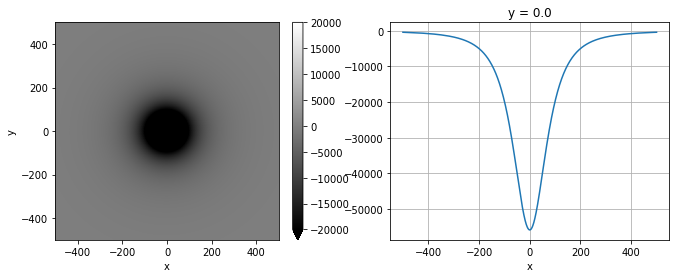

In [7]:
L = 500
l = np.linspace(-L,L,2*L+1)
(x,y) = np.meshgrid(l,l)

h = 100
r = 2.65

dg = -delta_grav(delta_mass_sphere(r,1), x, y, h)

dga = xr.DataArray(dg, coords={'y': l[::-1], 'x': l}, dims=['y','x'])
dga.values = (2**30-1)*dga
dga.values = np.flipud(np.round(dga.values)).astype(np.int32)

f, ((ax1, ax2)) = plt.subplots(1,2, figsize=(11,4))
dga.sel(x=slice(-500,500),y=slice(500,-500)).plot(ax=ax1, cmap='gray',vmin=-20000,vmax=20000)
dga.sel(y=0).plot(ax=ax2)
plt.grid()

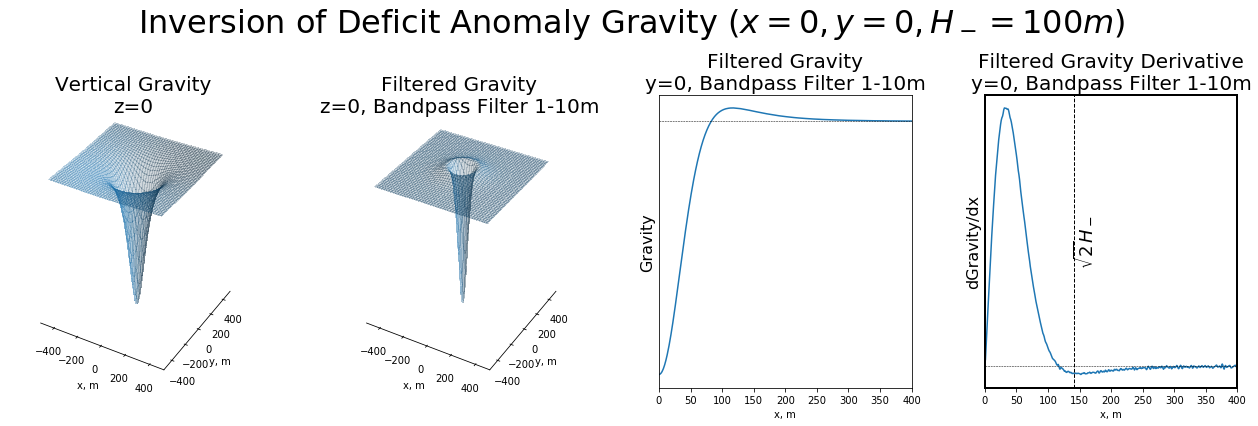

In [8]:
fdga = raster_gamma_range(dga, 1,10)

fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(1, 4, 1, projection='3d')
#dga.sel(x=slice(-500,500),y=slice(500,-500)).plot(ax=ax1, cmap='gray',vmin=0,vmax=20000, add_colorbar=False)
da = dga.sel(x=slice(-450,450),y=slice(450,-450))
(X,Y) = np.meshgrid(da.x,da.y)
Z=da.values
surf = ax1.plot_surface(X, Y, Z,linewidth=0, antialiased=False,alpha=0.2)
ax1.set_title('Vertical Gravity\nz=0', fontsize=20)
ax1.set_xlabel('x, m')
ax1.set_ylabel('y, m')
# make the panes transparent
ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.grid(False)
ax1.w_zaxis.line.set_lw(0.)
ax1.set_zticks([])
#ax1.axis('off')

ax4 = fig.add_subplot(1, 4, 2, projection='3d')
da = fdga.sel(x=slice(-450,450),y=slice(450,-450))
(X,Y) = np.meshgrid(da.x,da.y)
Z=da.values
surf = ax4.plot_surface(X, Y, Z,linewidth=0, antialiased=False,alpha=0.2)
ax4.set_title('Filtered Gravity\nz=0, Bandpass Filter 1-10m', fontsize=20)
ax4.set_xlabel('x, m')
ax4.set_ylabel('y, m')
# make the panes transparent
ax4.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax4.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax4.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax4.grid(False)
ax4.w_zaxis.line.set_lw(0.)
ax4.set_zticks([])
#ax4.axis('off')

ax5 = fig.add_subplot(1, 4, 3)
fdga.sel(x=slice(0,500)).sel(y=0).plot(ax=ax5)
ax5.set_title('Filtered Gravity\ny=0, Bandpass Filter 1-10m', fontsize=20)
ax5.set_xlim([0,400])
ax5.set_yticks([], [])
ax5.set_xlabel('x, m')
ax5.set_ylabel('Gravity', fontsize=16)

ax6 = fig.add_subplot(1, 4, 4)
fdga.sel(x=slice(0,500)).diff(dim='x').sel(y=0).plot(ax=ax6)
ax6.set_title('Filtered Gravity Derivative\ny=0, Bandpass Filter 1-10m', fontsize=20)
ax6.set_xlim([0,400])
ax6.set_yticks([], [])
ax6.set_xlabel('x, m')
ax6.set_ylabel('dGravity/dx', fontsize=16)

for ax in [ax5,ax6]:
    ax.axhline(y=0, c='black',lw=0.5,ls='--')

for ax in [ax6]:
    for x0 in [100*1.41]:
        ax.axvline(x=x0, c='black',lw=1,ls='--')
        ax.text(x0, (ax.get_ylim()[0]+ax.get_ylim()[1])/2,
            r"$\sqrt{2}H_-$", rotation=90, verticalalignment='center',fontsize=18)

for name in ['left','right','top','bottom']:
    ax6.spines[name].set_linewidth(2)

plt.suptitle(r"Inversion of Deficit Anomaly Gravity $(x=0, y=0, H_-=100m)$", fontsize=32)
fig.tight_layout(rect=[0.01, 0.0, 1, 0.9])
plt.savefig('Inversion of Gravity Field of Deepen Spheres 2.jpg', quality=95)
plt.show()

In [9]:
dga2 = dga.copy()
fdga2 = fdga.copy()

## Make synthetic gravity

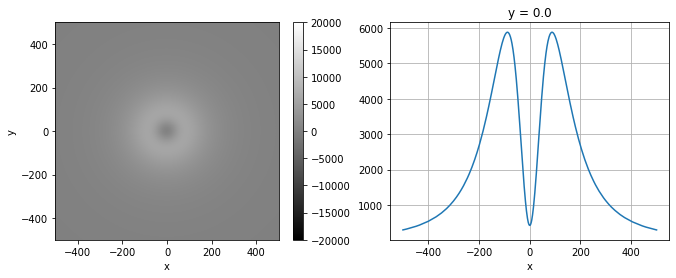

In [10]:
L = 500
l = np.linspace(-L,L,2*L+1)
(x,y) = np.meshgrid(l,l)

h1 = 100
h2 = 120
r1 = 2.65
r2 = 3

dg = -delta_grav(delta_mass_sphere(r1,1), x, y, h1)
dg = dg + delta_grav(delta_mass_sphere(r2,1), x, y, h2)

dga = xr.DataArray(dg, coords={'y': l[::-1], 'x': l}, dims=['y','x'])
dga.values = (2**30-1)*dga
dga.values = np.flipud(np.round(dga.values)).astype(np.int32)

f, ((ax1, ax2)) = plt.subplots(1,2, figsize=(11,4))
dga.sel(x=slice(-500,500),y=slice(500,-500)).plot(ax=ax1, cmap='gray',vmin=-20000,vmax=20000)
dga.sel(y=0).plot(ax=ax2)
plt.grid()

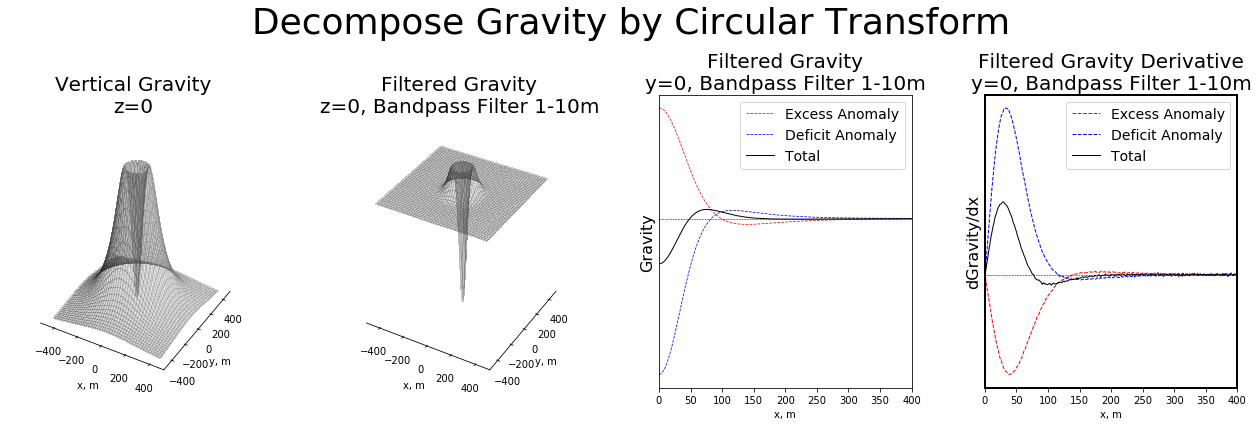

In [54]:
fdga = raster_gamma_range(dga, 1,10)

fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(1, 4, 1, projection='3d')
#dga.sel(x=slice(-500,500),y=slice(500,-500)).plot(ax=ax1, cmap='gray',vmin=0,vmax=20000, add_colorbar=False)
da = dga.sel(x=slice(-450,450),y=slice(450,-450))
(X,Y) = np.meshgrid(da.x,da.y)
Z=da.values
surf = ax1.plot_surface(X, Y, Z,linewidth=0, antialiased=False, color='gray',alpha=0.2)
ax1.set_title('Vertical Gravity\nz=0', fontsize=20)
ax1.set_xlabel('x, m')
ax1.set_ylabel('y, m')
# make the panes transparent
ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.grid(False)
ax1.w_zaxis.line.set_lw(0.)
ax1.set_zticks([])
#ax1.axis('off')

ax4 = fig.add_subplot(1, 4, 2, projection='3d')
da = fdga.sel(x=slice(-450,450),y=slice(450,-450))
(X,Y) = np.meshgrid(da.x,da.y)
Z=da.values
surf = ax4.plot_surface(X, Y, Z,linewidth=0, antialiased=False, color='gray',alpha=0.2)
ax4.set_title('Filtered Gravity\nz=0, Bandpass Filter 1-10m', fontsize=20)
ax4.set_xlabel('x, m')
ax4.set_ylabel('y, m')
# make the panes transparent
ax4.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax4.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax4.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax4.grid(False)
ax4.w_zaxis.line.set_lw(0.)
ax4.set_zticks([])
#ax4.axis('off')

ax5 = fig.add_subplot(1, 4, 3)
fdga1.sel(x=slice(0,500)).sel(y=0).plot(ax=ax5, color='red',ls='--',lw=0.75, label='Excess Anomaly')
fdga2.sel(x=slice(0,500)).sel(y=0).plot(ax=ax5, color='blue',ls='--',lw=0.75, label='Deficit Anomaly')
fdga.sel(x=slice(0,500)).sel(y=0).plot(ax=ax5, color='black',lw=1, label='Total')
ax5.set_title('Filtered Gravity\ny=0, Bandpass Filter 1-10m', fontsize=20)
ax5.set_xlim([0,400])
ax5.set_yticks([], [])
ax5.set_xlabel('x, m')
ax5.set_ylabel('Gravity', fontsize=16)
ax5.legend(fontsize=14)

ax6 = fig.add_subplot(1, 4, 4)
fdga1.sel(x=slice(0,500)).diff(dim='x').sel(y=0).plot(ax=ax6, color='red',ls='--',lw=1, label='Excess Anomaly')
fdga2.sel(x=slice(0,500)).diff(dim='x').sel(y=0).plot(ax=ax6, color='blue',ls='--',lw=1, label='Deficit Anomaly')
fdga.sel(x=slice(0,500)).diff(dim='x').sel(y=0).plot(ax=ax6, color='black',lw=1, label='Total')
ax6.set_title('Filtered Gravity Derivative\ny=0, Bandpass Filter 1-10m', fontsize=20)
ax6.set_xlim([0,400])
ax6.set_yticks([], [])
ax6.set_xlabel('x, m')
ax6.set_ylabel('dGravity/dx', fontsize=16)
ax6.legend(fontsize=14)

for ax in [ax5,ax6]:
    ax.axhline(y=0, c='black',lw=0.5,ls='--')

for name in ['left','right','top','bottom']:
    ax6.spines[name].set_linewidth(2)

plt.suptitle(r"Decompose Gravity by Circular Transform", fontsize=36)
fig.tight_layout(rect=[0.01, 0.0, 1, 0.9])
plt.savefig('Inversion of Gravity Field of Deepen Spheres 1.jpg', quality=95)
plt.show()

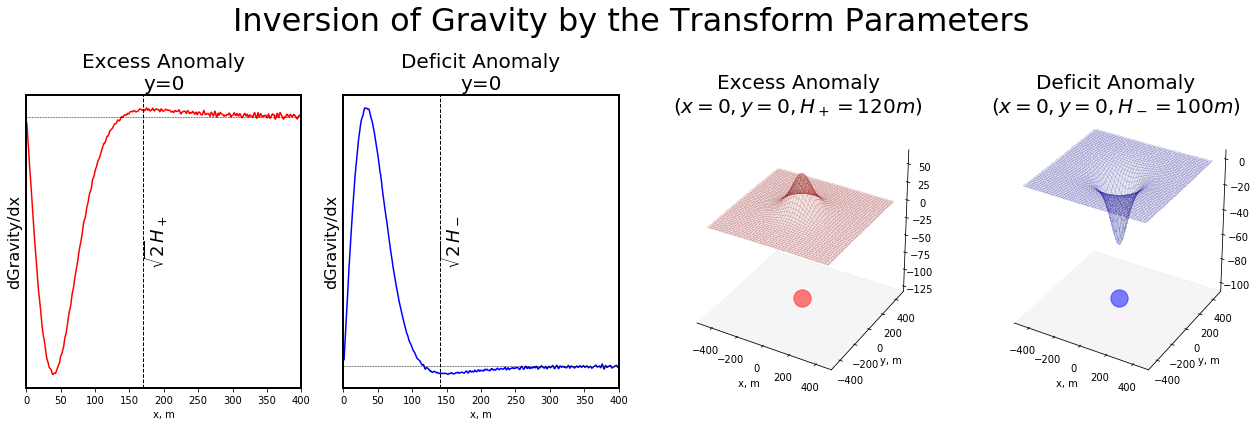

In [62]:
fdga = raster_gamma_range(dga, 1,10)

fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(1, 4, 3, projection='3d')
#dga.sel(x=slice(-500,500),y=slice(500,-500)).plot(ax=ax1, cmap='gray',vmin=0,vmax=20000, add_colorbar=False)
da = dga1.sel(x=slice(-450,450),y=slice(450,-450))
(X,Y) = np.meshgrid(da.x,da.y)
Z=da.values/1000
surf = ax1.plot_surface(X, Y, Z,linewidth=0, antialiased=False,color='red',alpha=0.1)
ax1.set_title("Excess Anomaly\n$(x=0, y=0, H_+=120m)$", fontsize=20)
ax1.set_xlabel('x, m')
ax1.set_ylabel('y, m')
# make the panes transparent
ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.grid(False)
#ax1.w_zaxis.line.set_lw(0.)
#ax1.set_zticks([])
#ax1.axis('off')

ax6 = fig.add_subplot(1, 4, 1)
fdga1.sel(x=slice(0,500)).diff(dim='x').sel(y=0).plot(ax=ax6,color='red')
ax6.set_title('Excess Anomaly\ny=0', fontsize=20)
ax6.set_xlim([0,400])
ax6.set_yticks([], [])
ax6.set_xlabel('x, m')
ax6.set_ylabel('dGravity/dx', fontsize=16)

for ax in [ax6]:
    ax.axhline(y=0, c='black',lw=0.5,ls='--')

for ax in [ax6]:
    for x0 in [120*1.41]:
        ax.axvline(x=x0, c='black',lw=1,ls='--')
        ax.text(x0, (ax.get_ylim()[0]+ax.get_ylim()[1])/2,
            r"$\sqrt{2}H_+$", rotation=90, verticalalignment='center',fontsize=18)

for name in ['left','right','top','bottom']:
    ax6.spines[name].set_linewidth(2)

ax1.scatter([0], [0], [-120], marker='o', s=300, color='red', alpha=0.5)

ax1 = fig.add_subplot(1, 4, 4, projection='3d')
#dga.sel(x=slice(-500,500),y=slice(500,-500)).plot(ax=ax1, cmap='gray',vmin=0,vmax=20000, add_colorbar=False)
da = dga2.sel(x=slice(-450,450),y=slice(450,-450))
(X,Y) = np.meshgrid(da.x,da.y)
Z=da.values/1000
surf = ax1.plot_surface(X, Y, Z,linewidth=0, antialiased=False,color='blue',alpha=0.1)
ax1.set_title("Deficit Anomaly\n$(x=0, y=0, H_-=100m)$", fontsize=20)
ax1.set_xlabel('x, m')
ax1.set_ylabel('y, m')
# make the panes transparent
ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.grid(False)
#ax1.w_zaxis.line.set_lw(0.)
#ax1.set_zticks([])
#ax1.axis('off')

ax6 = fig.add_subplot(1, 4, 2)
fdga2.sel(x=slice(0,500)).diff(dim='x').sel(y=0).plot(ax=ax6,color='blue')
ax6.set_title('Deficit Anomaly\ny=0', fontsize=20)
ax6.set_xlim([0,400])
ax6.set_yticks([], [])
ax6.set_xlabel('x, m')
ax6.set_ylabel('dGravity/dx', fontsize=16)

for ax in [ax6]:
    ax.axhline(y=0, c='black',lw=0.5,ls='--')

for ax in [ax6]:
    for x0 in [100*1.41]:
        ax.axvline(x=x0, c='black',lw=1,ls='--')
        ax.text(x0, (ax.get_ylim()[0]+ax.get_ylim()[1])/2,
            r"$\sqrt{2}H_-$", rotation=90, verticalalignment='center',fontsize=18)

for name in ['left','right','top','bottom']:
    ax6.spines[name].set_linewidth(2)

ax1.scatter([0], [0], [-100], marker='o', s=300, color='blue', alpha=0.5)

plt.suptitle("Inversion of Gravity by the Transform Parameters", fontsize=32)
fig.tight_layout(rect=[0.01, 0.0, 1, 0.9])
plt.savefig('Inversion of Gravity Field of Deepen Spheres 4.jpg', quality=95)
plt.show()